In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

In [2]:
# defino los paises en list paises
paises = ['CO','BR','PE','MX']

In [3]:
# llevo cada elemento de paises a que sea convertido a un numero
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

In [4]:
dataset = pd.read_csv('./db/salarios.csv')
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [7]:
# de forma aleatoria creo 30 elementos para dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]
paises_dataset[:10]

[2, 2, 1, 3, 2, 1, 1, 0, 0, 2]

In [8]:
# paises codificados y en lista pasados al dataset
dataset['pais'] = paises_dataset
dataset

,Aexperiencia,Salario,pais
0,10.0,42500,2
1,8.0,36302,2
2,5.4,35000,1
3,2.5,18103,3
4,1.0,15000,2
5,8.0,37000,1
6,4.0,26300,1
7,6.0,35201,0
8,2.0,18302,0
9,10.0,42000,2


In [9]:
# Dividiendo las columnas en x y y
x = dataset.drop('Salario', axis=1) #Se toman todas las columnas menos el de salario
y = dataset.iloc[:,1].values
print(x[:5])
print(y)

   Aexperiencia  pais
0          10.0     2
1           8.0     2
2           5.4     1
3           2.5     3
4           1.0     2
[42500 36302 35000 18103 15000 37000 26300 35201 18302 42000 27000 35201
 19201 28000 17000 33402 19000 18200 19000 17301 28000 20000 27900 17500
 40000 42500 18300 40000 25000 15000]


In [13]:
# dividimos nuestro dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [14]:
# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluamos performance
print(regressor.score(X_test, y_test))

0.8750139012487422


<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

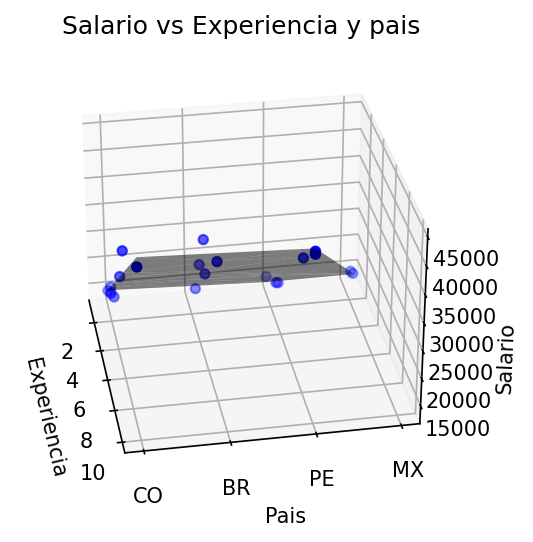

In [17]:
# ploteamos datos de entrenamiento para ver si realmente el 
# modelo lo hizo bien, se entreno como se debe
fig = plt.figure(dpi = 150)
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'],X_train['pais'], y_train, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario vs Experiencia y país')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('País')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

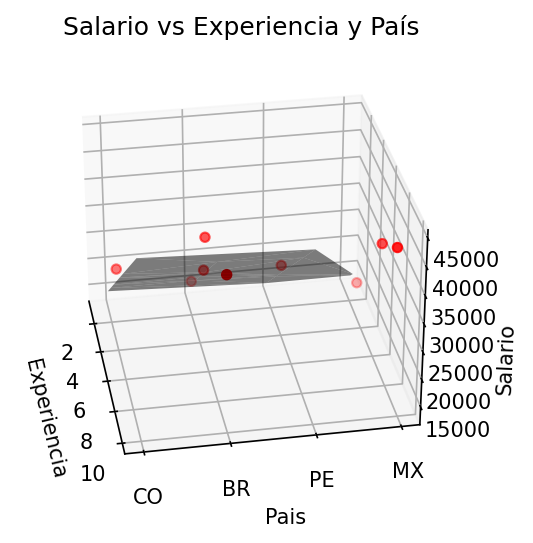

In [19]:
# probamos con datos de test
fig = plt.figure(dpi = 150)
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'],X_test['pais'], y_test, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario vs Experiencia y País')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show